In [169]:
#We need to Import all necessary libries first
#We need the data having at least two columns 
    # 1. Serial
    # 2. Ordered Column in ASC



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import ndtri

In [170]:
df = pd.read_csv("univariate_data.csv")

In [171]:
df.head()

,Sl,Radiation,Ordered Radiation
0,1,0.15,0.01
1,2,0.09,0.01
2,3,0.18,0.02
3,4,0.10,0.02
4,5,0.05,0.02


In [172]:
# Adding new column of Probability Level [j - 0.5/n] for every row in the serial column
def add(row):
   return (row[0]-0.5)/len(df["Sl"])

df['prob_level'] = df.apply(add, axis=1)
print(df.head())

   Sl  Radiation  Ordered Radiation  prob_level
0   1       0.15               0.01    0.011905
1   2       0.09               0.01    0.035714
2   3       0.18               0.02    0.059524
3   4       0.10               0.02    0.083333
4   5       0.05               0.02    0.107143


In [173]:
# Getting the Z Score of Prob_Level Column
stats.zscore(df["prob_level"].head())

0   -1.414214
1   -0.707107
2    0.000000
3    0.707107
4    1.414214
Name: prob_level, dtype: float64

In [174]:
# you'll find that the ppf method ultimately calls scipy.special.ndtri. So to compute the inverse of the CDF of the standard normal distribution, you could use that function directly (Standard Normal Quantile):
ndtri(df["prob_level"].head())

0   -2.260189
1   -1.802743
2   -1.558784
3   -1.382994
4   -1.241867
Name: prob_level, dtype: float64

In [175]:
#Adding new column "Standard Normal Quantile"
df["Standard Normal Quantile"] = ndtri(df["prob_level"])

In [176]:
df.head()

,Sl,Radiation,Ordered Radiation,prob_level,Standard Normal Quantile
0,1,0.15,0.01,0.011905,-2.260189
1,2,0.09,0.01,0.035714,-1.802743
2,3,0.18,0.02,0.059524,-1.558784
3,4,0.10,0.02,0.083333,-1.382994
4,5,0.05,0.02,0.107143,-1.241867


In [177]:
# Calculate the Correlation coefficient value
corr = df.corr().loc['Standard Normal Quantile', 'Ordered Radiation']
corr_cal

0.927904898110128

In [178]:
# From Critical Points for Q-Q Plot Correlation Coefficient Test for Normality Table
# for n = 42, Level of significance = 5%
# Link: http://www.dm.unibo.it/~simoncin/QQCritVal.pdf
corr_tabulated = 0.9749

<AxesSubplot:xlabel='Ordered Radiation', ylabel='Standard Normal Quantile'>

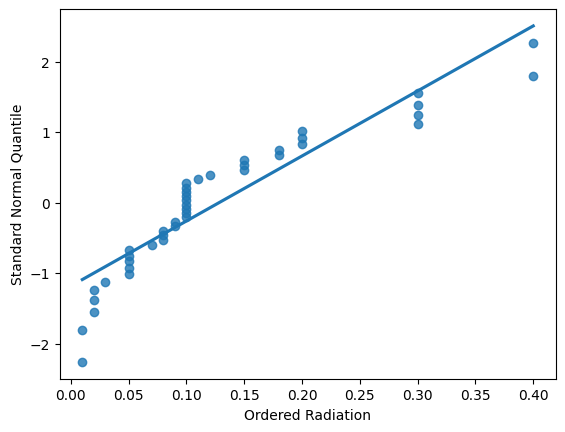

In [179]:
# Lets check QQ-Plot or Regression Plot of (Standard Normal Quantile vs Ordered Radiation) [The values must be sorted in Ascending Order]
sns.regplot(data = df,x=df["Ordered Radiation"].sort_values(), y=df["Standard Normal Quantile"].sort_values(),ci=None)

The angle of the line is not 45 degree and data points are mostly outside the line.
Thus, by seeing the plot we can say Data is not normal.

In [180]:
# Lets test the hypothesis for this procedure
H0 = "Distribution is not normal"
Ha = "Distribution is normal"

In [181]:
#Let's check our output

if corr_cal > corr_tabulated:
    print("The null hypothesis is rejected. Hence",Ha)
else:
    print("We can't reject the null hypothesis. Hence",H0)

We can't reject the null hypothesis. Hence Distribution is not normal
